In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score
import warnings

warnings.filterwarnings("ignore")

In [45]:
df_results = pd.read_csv('results_testing.csv')

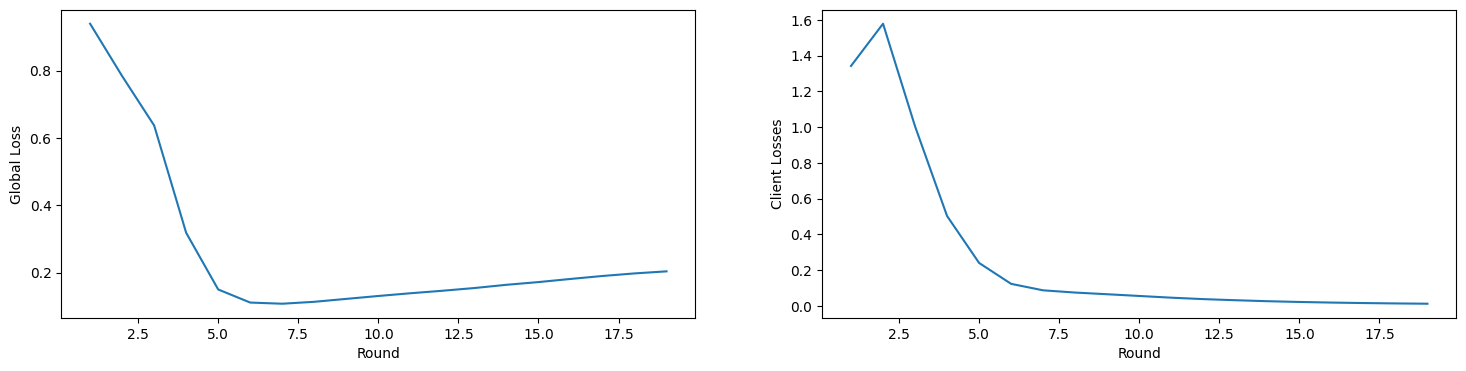

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(18, 4))

sns.lineplot(x='round', y='eval_global_loss', data=df_results, ax=axs[0])
sns.lineplot(x='round', y='client_losses_train', data=df_results, ax=axs[1])

axs[0].set_title('Global Loss - Validation Server Set')
axs[0].set_xlabel('Round')
axs[0].set_ylabel('Global Loss')

axs[1].set_title('Client Losses - Training Client Set')
axs[1].set_xlabel('Round')
axs[1].set_ylabel('Client Losses')

plt.show()

In [47]:
df_detect_results = pd.read_csv('detection_testing.csv')

In [ ]:

rounds = df_detect_results['round'].unique()
f1s = []
precisions = []
recalls = []

for round in rounds:
    ths = np.linspace(0, 1, 1000)

    best_f1 = 0
    best_th = 0

    df = df_detect_results[df_detect_results['round'] == round]

    for th in ths:
        df['pred'] = df['accuracy'] < th
        df['pred'] = df['pred'].astype(int)

        f1 = f1_score(df['label'], df['pred'])
        precision = precision_score(df['label'], df['pred'])
        recall = recall_score(df['label'], df['pred'])

        if f1 > best_f1:
            best_f1 = f1
            best_th = th


    df['pred'] = df['accuracy'] < best_th
    df['pred'] = df['pred'].astype(int)

    f1 = f1_score(df['label'], df['pred'])
    precision = precision_score(df['label'], df['pred'])
    recall = recall_score(df['label'], df['pred'])

    print(f'Round: {round} -------------')
    #print(f'Threshold: {best_th}')
    #print(f'F1: {f1}')
    #print(f'Precision: {precision}')
    #print(f'Recall: {recall}')

    f1s.append(f1)
    precisions.append(precision)
    recalls.append(recall)

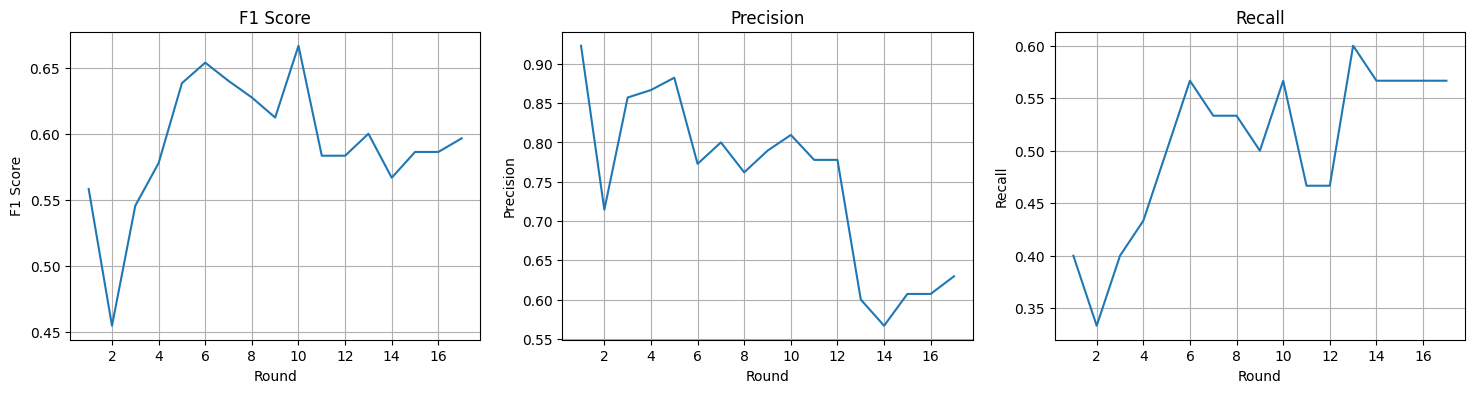

In [49]:
#trhee subplots

fig, axs = plt.subplots(1, 3, figsize=(18, 4))

sns.lineplot(x=rounds, y=f1s, ax=axs[0])
axs[0].set_title('F1 Score')
axs[0].set_xlabel('Round')
axs[0].set_ylabel('F1 Score')

sns.lineplot(x=rounds, y=precisions, ax=axs[1])
axs[1].set_title('Precision')
axs[1].set_xlabel('Round')
axs[1].set_ylabel('Precision')

sns.lineplot(x=rounds, y=recalls, ax=axs[2])
axs[2].set_title('Recall')
axs[2].set_xlabel('Round')
axs[2].set_ylabel('Recall')

for ax in axs:
    ax.grid(True)